<a href="https://colab.research.google.com/github/Allajka/statistics/blob/main/seminar_8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

* Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны.
* Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [8]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

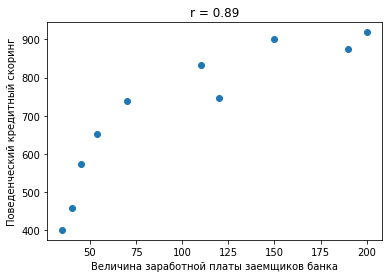

In [20]:
plt.scatter(zp, ks)
plt.title('r = 0.89')
plt.xlabel('Величина заработной платы заемщиков банка')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

## Ковариация

$$cov_(xy)=M(XY)-M(X) * M(Y)$$

In [10]:
cov = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
cov

9157.839999999997

In [12]:
np.cov(zp, ks, ddof = 0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

**Ответ** cov = 9157.84 ---> Обе величины двигаются вверх.

## Коэффициент корреляции Пирсона

$$r= \frac{cov_(xy)}{σ_x * σ_y}$$

In [14]:
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [15]:
np.cov(zp, ks, ddof = 0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [16]:
np.std(zp, ddof = 0)

59.115480206118605

In [17]:
np.std(ks, ddof = 0)

174.55340157098058

In [18]:
9157.84 / (59.115480206118605 * 174.55340157098058)

0.8874900920739162

**Ответ** 
Коэффициент корреляции Пирсона = 0.89.

Это говорит нам о сильной прямой линейной зависимости двух величин, рост одной случайной величины сопровождается ростом другой случайной величины.

**Вывод по первой задаче:** после анализа графика, ковариации и коэффициента корреляции предполагаем, что у нас сильная прямая ленейная зависимость. При увеличении заработной платы заемщиков увеличивается значения их поведенческого кредитного скоринга.

# Задание 2

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ **распределен нормально**.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

**Решение:** так как у нас не известна σ генеральной совокупности, воспользуемся формулой:

$$\overline{x} ± t_\frac{a}{2} * \frac{σ}{\sqrt{n}}$$

Тест проведем двухстроний т.к. нам ничего не известно о генеральной совокупности.

In [23]:
iq_students= np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111]) 

In [24]:
mean_iq_students = np.mean(iq_students) # Среднее арифметиическое
mean_iq_students

118.1

In [25]:
dispersion = round(np.var(iq_students, ddof=1), 2) # несмещенная дисперсия
dispersion

111.21

In [26]:
t_tabular = stats.t.ppf(0.975, len(iq_students) - 1) # t_табличное, 100-5/2 и 10-1
t_tabular

2.2621571627409915

In [28]:
left_border = round(mean_iq_students - t_tabular * np.sqrt(dispersion/len(iq_students)), 3)
right_border = round(mean_iq_students + t_tabular * np.sqrt(dispersion/len(iq_students)), 3)
print(f"Доверительный интервал [{left_border} ; {right_border}]")

Доверительный интервал [110.556 ; 125.644]


**Ответ:** C вероятностью 95% IQ студентов, обучающихся в местных технических вузах попадет в доверительный интервал [110.556 ; 125.644] и захватит истинное математическое ожидание.

# Задание 3

Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, **D = 25 кв.см**. Объем выборки равен **n = 27**, **среднее выборочное составляет 174.2**. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

**Решение:** так как у нас известна σ генеральной совокупности, воспользуемся формулой:

$$\overline{x} ± z_\frac{a}{2} * \frac{σ}{\sqrt{n}}$$

$$\overline{x} = 174.2, D = 25, n = 27, a = 5$$

$$z_\frac{a}{2} = 5/2 = 2.5, по таблице = 1,96 $$

$$174.2 ± 1.96 * \frac{\sqrt{25}}{\sqrt{27}}$$

In [32]:
174.2 + 1.96 * ((25**0.5)/27**0.5)

176.08601087935276

In [33]:
174.2 - 1.96 * ((25**0.5)/27**0.5)

172.31398912064722

**Ответ:** C вероятностью 95% рост футболистов в сборной попадет в доверительный интервал [172.314; 176.086] и захватит истинное математическое ожидание.